In [36]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#Showing directories’ size
import os, shutil

train_dir ='/content/drive/MyDrive/images/train'
validation_dir = '/content/drive/MyDrive/images/val'
test_dir = '/content/drive/MyDrive/images/test'

train_corona_virus_d = '/content/drive/MyDrive/images/train/Corona_Virus_Disease'
train_normal = '/content/drive/MyDrive/images/train/Normal'
train_tuberculosis= '/content/drive/MyDrive/images/train/Tuberculosis'

val_corona_virus_d = '/content/drive/MyDrive/images/val/Corona_Virus_Disease'
val_normal = '/content/drive/MyDrive/images/val/Normal'
val_tuberculosis= '/content/drive/MyDrive/images/val/Tuberculosis'

test_corona_virus_d = '/content/drive/MyDrive/images/test/Corona_Virus_Disease'
test_normal = '/content/drive/MyDrive/images/test/Normal'
test_tuberculosis= '/content/drive/MyDrive/images/test/Tuberculosis'


print('total train corona virus images:', len(os.listdir(train_corona_virus_d)))
print('total train normal images:', len(os.listdir(train_normal)))
print('total train tuberculosis images:', len(os.listdir(train_tuberculosis)))


print('total validation corona virus images:', len(os.listdir(val_corona_virus_d)))
print('total validation normal images:', len(os.listdir(val_normal)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis)))


print('total testing organic corona virus img:', len(os.listdir(test_corona_virus_d)))
print('total testing recicle normal imgs:', len(os.listdir(test_normal)))
print('total testing recicle tuberculosis img:', len(os.listdir(test_tuberculosis)))

total train corona virus images: 1218
total train normal images: 1207
total train tuberculosis images: 1220
total validation corona virus images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing organic corona virus img: 407
total testing recicle normal imgs: 404
total testing recicle tuberculosis img: 408


In [38]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical',
    seed = 100
)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    label_mode='categorical',
    seed = 100
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    label_mode='categorical',
    seed = 100
)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


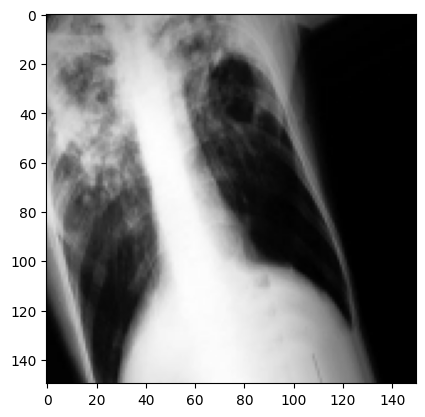

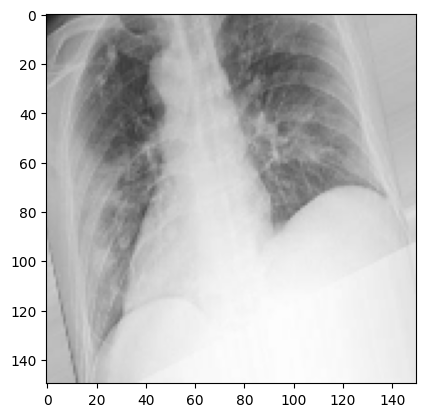

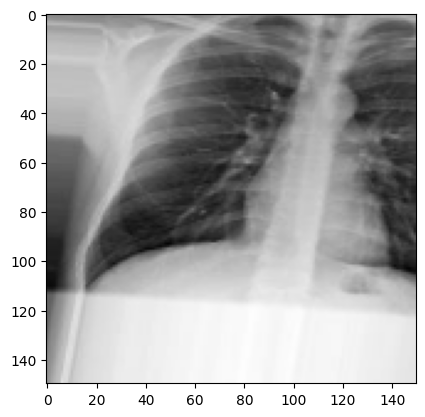

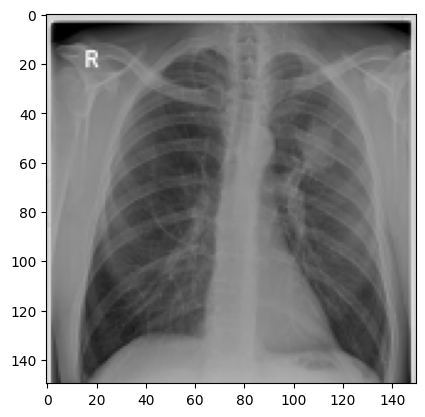

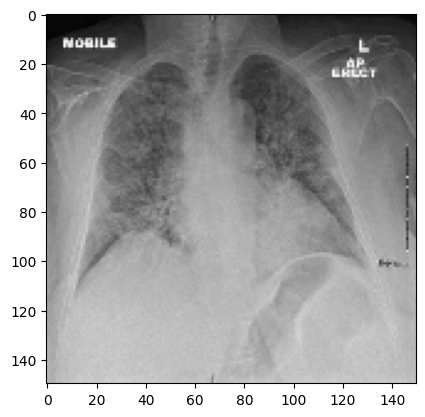

In [27]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

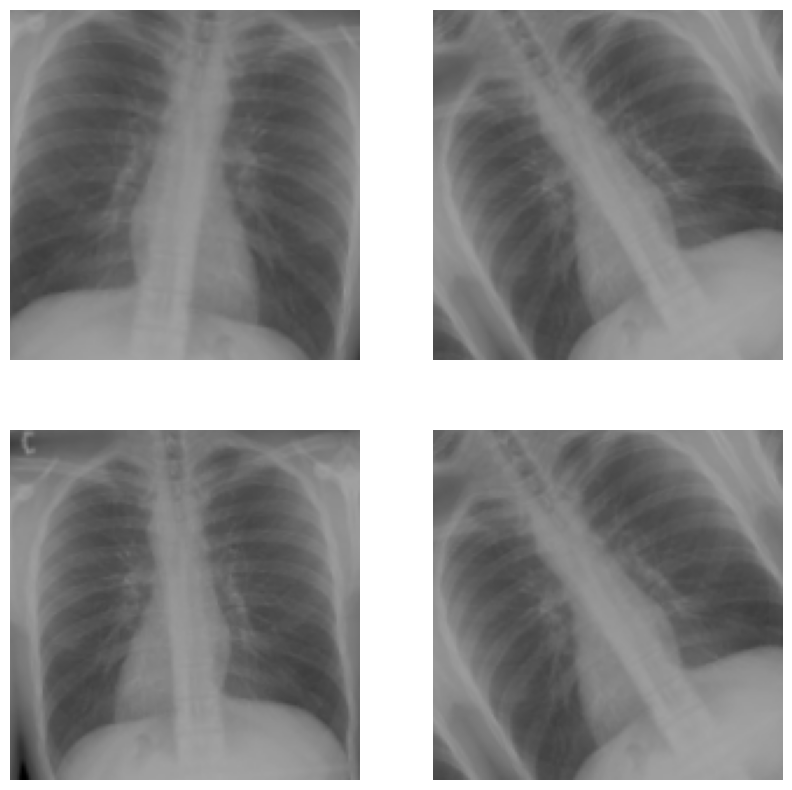

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [40]:
from keras.applications.vgg16 import VGG16

# Crear el modelo base de VGG16 preentrenado en ImageNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [41]:
# Congelar las capas de la base convolucional para que no se entrenen
conv_base.trainable = False

In [42]:
from tensorflow import keras
from keras import layers, models

# Construir el modelo
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = conv_base(x, training=False)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 771 

In [43]:
import tensorflow as tf
# Compilar el modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    metrics=['acc'])

In [44]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True,monitor='val_loss')
]

In [45]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/10
114/114 [==============================] - 60s 419ms/step - loss: 4.9572 - acc: 0.6022 - val_loss: 1.2213 - val_acc: 0.8476
Epoch 2/10
114/114 [==============================] - 54s 438ms/step - loss: 2.3393 - acc: 0.7657 - val_loss: 0.8134 - val_acc: 0.8962
Epoch 3/10
114/114 [==============================] - 54s 435ms/step - loss: 1.5330 - acc: 0.8176 - val_loss: 0.6403 - val_acc: 0.9069
Epoch 4/10
114/114 [==============================] - 53s 429ms/step - loss: 1.3163 - acc: 0.8348 - val_loss: 0.5290 - val_acc: 0.9209
Epoch 5/10
114/114 [==============================] - 52s 419ms/step - loss: 1.0549 - acc: 0.8551 - val_loss: 0.4522 - val_acc: 0.9234
Epoch 6/10
114/114 [==============================] - 50s 419ms/step - loss: 0.9228 - acc: 0.8634 - val_loss: 0.3751 - val_acc: 0.9292
Epoch 7/10
114/114 [==============================] - 52s 434ms/step - loss: 0.7381 - acc: 0.8776 - val_loss: 0.3650 - val_acc: 0.9234
Epoch 8/10
114/114 [==============================] - 5

In [46]:
model.save('./ModelT_Feature_Extraction_WithAugmentation_xray.keras')

In [47]:
keras.models.load_model('./ModelT_Feature_Extraction_WithAugmentation_xray.keras')

In [48]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

38/38 [==============================] - 13s 284ms/step - loss: 0.2694 - acc: 0.9407
val_acc: 0.9406919479370117


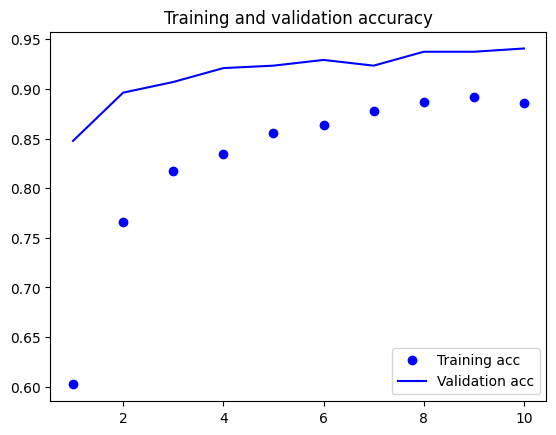

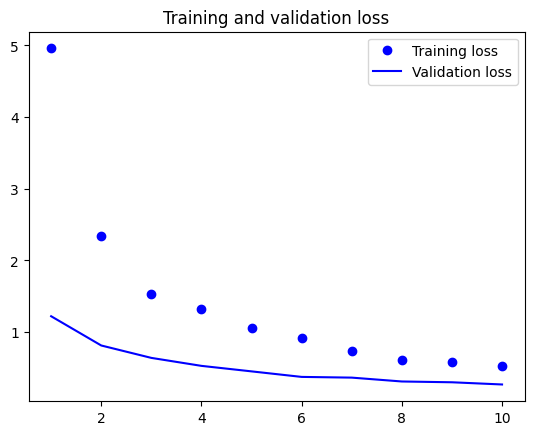

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

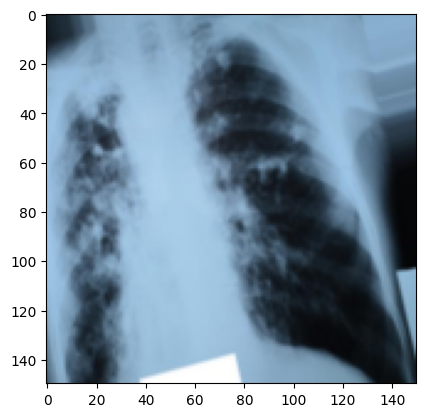

(1, 150, 150, 3)
1/1 [==============================] - 0s 148ms/step
Class index: [2]
One-hot encoded prediction: [[0. 0. 1.]]


In [51]:
# img = tf.keras.preprocessing.image.load_img('./train/cats/cat.1.jpg', target_size=(150, 150), interpolation='bilinear')
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/images/val/Tuberculosis/test_0_274.jpeg', target_size=(150, 150), interpolation='bilinear')
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)

# Convert prediction to class index (0, 1, 2)
class_index = np.argmax(result, axis=1)

# Convert class index to one-hot encoded vector
one_hot_prediction = to_categorical(class_index, num_classes=3)

# Print the result
print("Class index:", class_index)
print("One-hot encoded prediction:", one_hot_prediction)

1/1 [==============================] - 0s 22ms/step


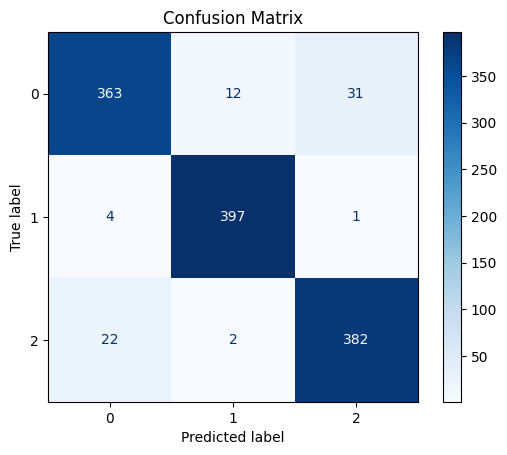

Classification Report:
                       precision    recall  f1-score   support

Corona_Virus_Disease       0.93      0.89      0.91       406
              Normal       0.97      0.99      0.98       402
        Tuberculosis       0.92      0.94      0.93       406

            accuracy                           0.94      1214
           macro avg       0.94      0.94      0.94      1214
        weighted avg       0.94      0.94      0.94      1214



In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Inicializar listas para almacenar etiquetas verdaderas y predicciones
true_labels = []
predictions = []

# Iterar a través del conjunto de validación y predecir
for images, labels in validation_dataset:
    preds = model.predict(images)
    predictions.extend(preds)
    true_labels.extend(labels.numpy())

# Convertir las listas a arrays de numpy
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Si las etiquetas verdaderas están en formato one-hot encoded, convertirlas a etiquetas enteras
if true_labels.ndim == 2 and true_labels.shape[1] > 1:
    true_labels_int = np.argmax(true_labels, axis=1)
else:
    true_labels_int = true_labels

# Asegurarse de que las predicciones son probabilidades y luego convertirlas a etiquetas enteras
predictions_int = np.argmax(predictions, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_labels_int, predictions_int)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Generar y mostrar el reporte de clasificación
report = classification_report(true_labels_int, predictions_int, target_names=validation_dataset.class_names)
print("Classification Report:\n", report)